In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# fig = plt.figure() 
# # create figure window

# gs = gridspec.GridSpec(50, 50)
# # Creates grid 'gs' of a rows and b columns 


def load_data(dataset, country_list):
    """
    This function takes in a csv file and a list of countries that are of
    interest. Returns two dataframes one with the years as columns and the
    other country names as columns.

    Parameters
    ----------
    dataset : .csv file
    country_list : List
    """
    # skipping first 4 rows, as they contain non essential data.
    world_bank_df = pd.read_csv(dataset, skiprows=4)

    # Removing non essential data.
    world_bank_df.drop(['Country Code', 'Indicator Code', 'Unnamed: 67'],
                       axis=1, inplace=True)

    # subsetting the dataframe to get data for countries we are interested in.
    world_bank_df = world_bank_df[
        world_bank_df['Country Name'].isin(country_list)]

    # Setting index before transposing the dataframe
    temp_df = world_bank_df.set_index('Country Name')

    return world_bank_df, temp_df.T


def generate_line_plot(data, countries, indicator, xlabel, ylabel, title):
    """
    This function generates line plots for the given dataframe for a particular
    indicator in the world bank dataset. It also requires a list of country
    names.
    Parameters
    ----------
    data : TYPE
    countries : TYPE
    indicator : TYPE
    xlabel : TYPE
    ylabel : TYPE
    title : TYPE

    Returns None.

    """
    
    # Specifying figure size, as plot is big
#     plt.figure(figsize=(15, 8))

    # Iterating over the list of countries
    for country in countries:
        temp_df = data[country].T
        # Subsetting the transposed df. Which now has years as columns
        subset_df = temp_df[temp_df['Indicator Name'] == indicator]
        # Transposing the df again to makes years the index.
        subset_df = subset_df.T

        # Plotting using the subset df.
        # Plotting using for loop to include line plots of every country
        # in the same figure.
        
        plt.plot(subset_df[1:], label=country)

        # Labelling
        plt.xticks(rotation=90)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.legend()

    # Saving the figure.
#     plt.savefig('figures/line_graph_'+indicator+'.png',
#                 bbox_inches='tight',
#                 dpi=200)
#      plt.show()

    return 


def generate_pie_chart(data, year, countries, indicator, title):
    """
    Creates a pie chart for the specified year. Uses the dataframe plot
    function create a pie chart for a list of countries
    and a specific indicator.

    Parameters
    ----------
    data : Pandas DataFrame
    year : String
    countries : List
    indicator : string

    Returns None

    """
    # Creating an  empty Dataframe to store the specified indicator values for
    # each country.
    result = pd.DataFrame()

    # Iterating through the list of countries
    for country in countries:
        # Transposing the dataframe to be able to extract indicator values
        temp_df = data[country].T
        subset_df = temp_df[temp_df['Indicator Name'] == indicator]

        # Transposing the subset to make the years rows from columns.
        subset_df = subset_df.T

        # Creating a new column in the result df and add the current country's
        # indicator value, i.e the subset_df
        result[country] = subset_df

    # Since the dataframe contains values of only one indicator value and
    # only country name is needed, dropping the first row with indicator name.
    result = result.drop(['Indicator Name'], axis=0)

    # Selecting a particular year for the pie chart.
    result = result.loc[str(year)]
#     plt.figure()

    # Plotting pie chart using the df.plot method
    result.plot(kind='pie', subplots=True, autopct="%1.f%%", ylabel="")

    # using arguments passed while calling funtion to create title.
    plt.title(title+" in "+str(year))

    # Saving the pie chart.
#     plt.savefig("figures/pie_chart_"+title+".png",
#                 bbox_inches='tight',
#                 dpi=200)
#     plt.show()

    return

def generate_bar_plot(data, year, indicator, image_name, title):
    """
    This function generates a bar plot of the Population growth (annual %)
    for the countries specified in the country_list variable. For a given year

    Returns None.
    """

    # Extracting only the selected indicator's data
    subset_data = data[
        data['Indicator Name'] == indicator]
    
#     plt.figure()

    # Passing X-axis as country names and Y-axis is all rows,
    # in the specified year. Here year is a column name
    plt.bar(subset_data['Country Name'],
            subset_data.loc[:, str(year)])

    # labelling
    plt.xlabel("Country")
    plt.ylabel("%")
    plt.xticks(rotation=20)
    plt.title(title)

    # Saving the generatad plot
#     plt.savefig('figures/barplot'+image_name+'.png',
#                 bbox_inches='tight',
#                 dpi=200)

#     plt.show()

    return

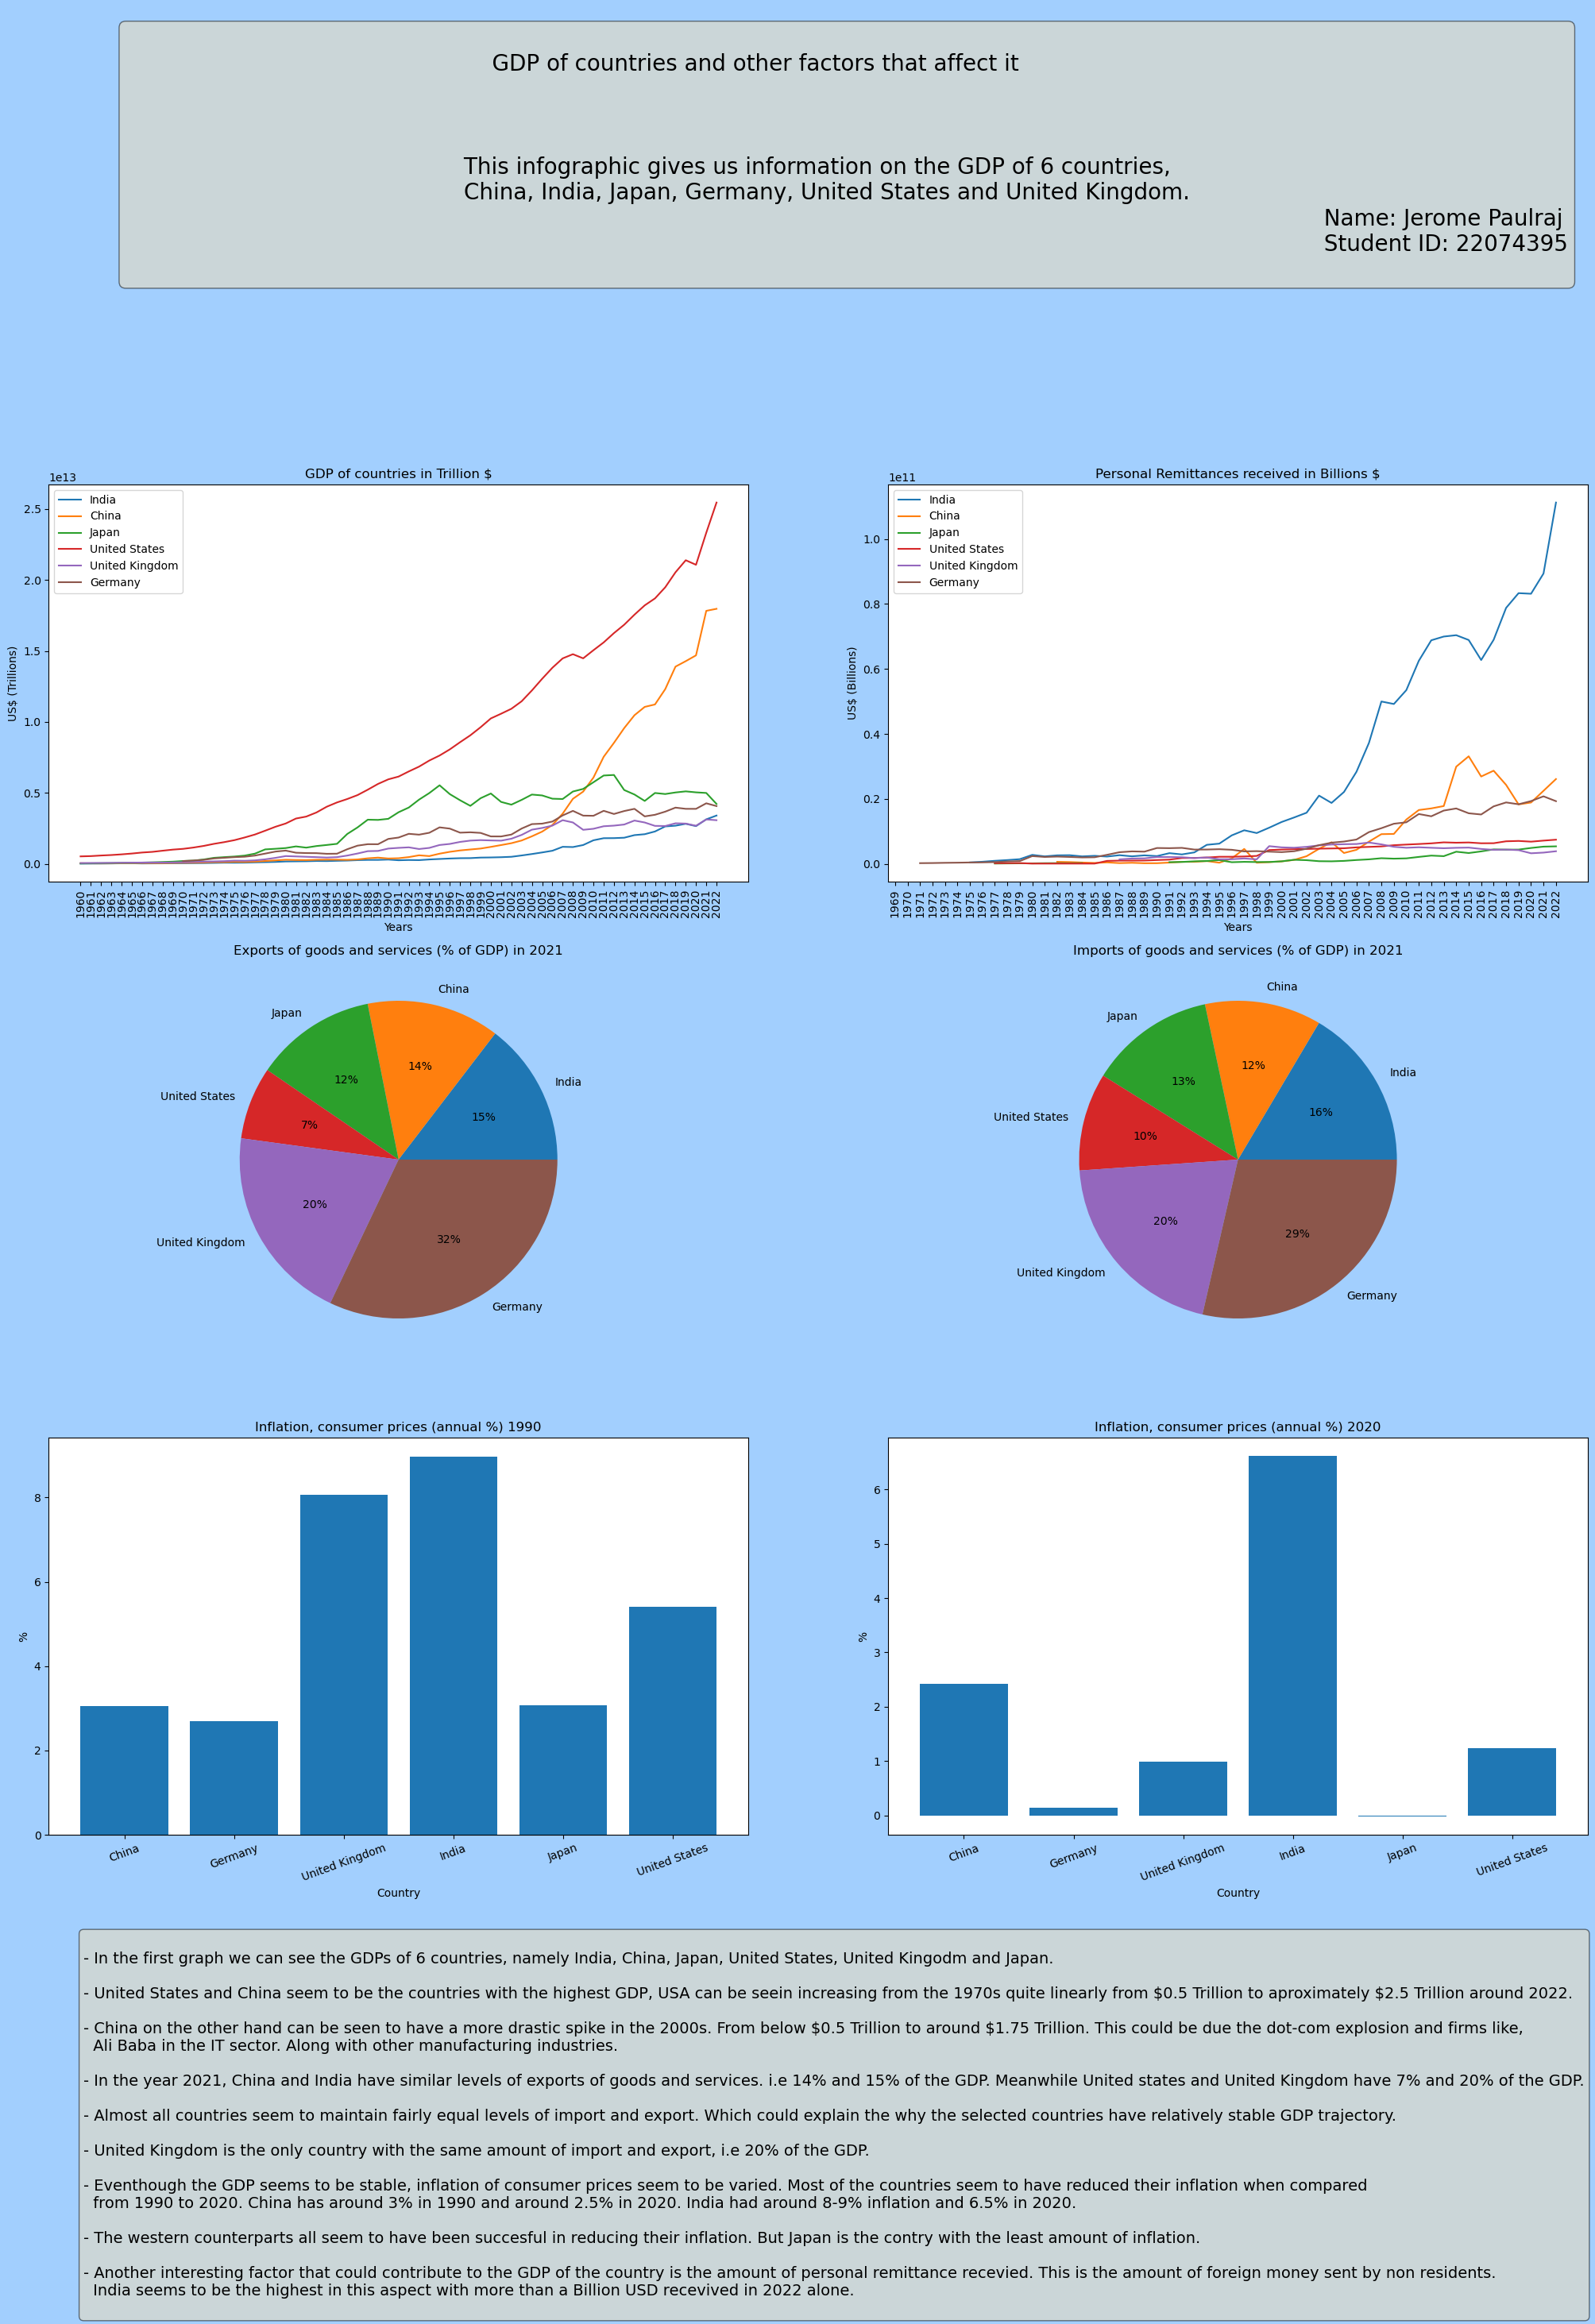

In [43]:
countries = ['India', 'China', 'Japan', 'United States', 'United Kingdom', 'Germany']

data, dataT = load_data(
    'economy_growth.csv',
    countries)


fig = plt.figure(figsize=[25,25])


# plt.suptitle('Test Title - 22078325792', verticalalignment='top')

plt.subplot(711)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

textstr = """
                                                    GDP of countries and other factors that affect it

                      

                                                This infographic gives us information on the GDP of 6 countries,
                                                China, India, Japan, Germany, United States and United Kingdom.                                 
                                                                                                                                                                          Name: Jerome Paulraj
                                                                                                                                                                          Student ID: 22074395
 """

plt.axis('off')
plt.text(0.05, 0.95, textstr, bbox=props,fontsize=20, verticalalignment='top')



plt.subplot(723)


# Create the first figure and axis
# fig1, ax1 = plt.subplots()

generate_line_plot(dataT, countries,
                   'GDP (current US$)',
                   "Years",
                   "US$ (Trillions)",
                   "GDP of countries in Trillion $"
                  )


plt.subplot(724)

# Create the first figure and axis
# fig2, ax2 = plt.subplots()

# Generating a line plot of CO2 Emissions for the selected countries
generate_line_plot(dataT, countries,
                   'Personal remittances, received (current US$)',
                   "Years",
                   "US$ (Billions)",
                   "Personal Remittances received in Billions $",
                  )


plt.subplot(725)

# fig3, ax3 = plt.subplots(1,2)

# Creating a pie chart of an indicator for a selected country and year.
generate_pie_chart(
    dataT,
    2021,
    countries,
    'Exports of goods and services (% of GDP)',
    'Exports of goods and services (% of GDP)'
)



plt.subplot(726)

# Creating a pie chart of an indicator for a selected country and year.
generate_pie_chart(
    dataT,
    2021,
    countries,
    'Imports of goods and services (% of GDP)',
    'Imports of goods and services (% of GDP)'
)

plt.subplot(7,2,7)

generate_bar_plot(
    data,
    1990,
    'Inflation, consumer prices (annual %)',
    image_name='population_growth_2020',
    title="Inflation, consumer prices (annual %) 1990"
)



plt.subplot(728)
# fig4, ax4 = plt.subplots(1,2)

generate_bar_plot(
    data,
    2020,
    'Inflation, consumer prices (annual %)',
    image_name='population_growth_2020',
    title="Inflation, consumer prices (annual %) 2020"
)



plt.subplot(7,2,9)

# fig5, ax5 = plt.subplots(1,2)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

textstr = """
- In the first graph we can see the GDPs of 6 countries, namely India, China, Japan, United States, United Kingodm and Japan.

- United States and China seem to be the countries with the highest GDP, USA can be seein increasing from the 1970s quite linearly from \$0.5 Trillion to aproximately \$2.5 Trillion around 2022.

- China on the other hand can be seen to have a more drastic spike in the 2000s. From below \$0.5 Trillion to around \$1.75 Trillion. This could be due the dot-com explosion and firms like,
  Ali Baba in the IT sector. Along with other manufacturing industries.

- In the year 2021, China and India have similar levels of exports of goods and services. i.e 14% and 15% of the GDP. Meanwhile United states and United Kingdom have 7% and 20% of the GDP.

- Almost all countries seem to maintain fairly equal levels of import and export. Which could explain the why the selected countries have relatively stable GDP trajectory.

- United Kingdom is the only country with the same amount of import and export, i.e 20% of the GDP.

- Eventhough the GDP seems to be stable, inflation of consumer prices seem to be varied. Most of the countries seem to have reduced their inflation when compared
  from 1990 to 2020. China has around 3% in 1990 and around 2.5% in 2020. India had around 8-9% inflation and 6.5% in 2020.

- The western counterparts all seem to have been succesful in reducing their inflation. But Japan is the contry with the least amount of inflation.

- Another interesting factor that could contribute to the GDP of the country is the amount of personal remittance recevied. This is the amount of foreign money sent by non residents.
  India seems to be the highest in this aspect with more than a Billion USD recevived in 2022 alone.
 """

# plt.figtext(0,0,textstr, fontsize = 10) 

plt.text(0.05, 0.95, textstr, fontsize=14,bbox=props,verticalalignment='top')
# plt.tight_layout()
plt.subplots_adjust(top = 1.75)

plt.axis('off')

fig.patch.set_facecolor('xkcd:baby blue')


# plt.title('RfdsdS')

plt.savefig('test.png', bbox_inches='tight',
                dpi=300)
